# Ford Go Bike Data Exploration


## Preliminary Wrangling

This document explores a dataset containing about 183412 trip and 16 features using Fordgo bike

In [1]:
# import all the packages and set plots to be embedded inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import requests

%matplotlib inline 

In [2]:
# # Download the dataset for the project

# url = 'https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv'

# response = requests.get(url)
# with open(url.split('/')[-1], 'wb') as file:
#     file.write(response.content)

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# overview the data composition and statistics

print('Shape of the dataframe: \t ', df.shape, '\n')
print('Data type of the features:\n', df.dtypes, '\n')
print('Summary statistics of null value:\n', df.isnull().sum())

Shape of the dataframe: 	  (183412, 16) 

Data type of the features:
 duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object 

Summary statistics of null value:
 duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0

#### Observation
* start_time and end_time are in object type instead of datetime
* member_birth_year is float instead of integer

In [5]:
# Extract records with null value for start_staion_id
start_station_id = df[df.start_station_id.isnull()]
print(start_station_id.sample(10))

        duration_sec                start_time                  end_time  \
54296            521  2019-02-21 13:12:37.1710  2019-02-21 13:21:18.7680   
155470           984  2019-02-06 08:39:02.6480  2019-02-06 08:55:26.6830   
23515            352  2019-02-25 20:13:00.9730  2019-02-25 20:18:53.0700   
115413          2763  2019-02-12 08:03:59.4360  2019-02-12 08:50:03.1340   
122387           150  2019-02-11 12:06:44.5050  2019-02-11 12:09:14.9460   
85982            298  2019-02-17 13:58:21.9890  2019-02-17 14:03:20.6900   
46388            735  2019-02-22 09:46:04.0230  2019-02-22 09:58:19.0890   
27544            743  2019-02-25 09:26:04.6320  2019-02-25 09:38:28.5330   
127820           936  2019-02-10 14:42:20.4730  2019-02-10 14:57:57.2160   
34938            964  2019-02-23 20:25:47.6660  2019-02-23 20:41:52.0800   

        start_station_id start_station_name  start_station_latitude  \
54296                NaN                NaN                   37.40   
155470               

#### Observation
Records with null value for start_station_id also have null value for start_station_name, end_station_id and end_station_name

In [6]:
# extract record with null value for member_birth_year

null_birth_year = df[df.member_birth_year.isnull()]
print(null_birth_year.sample(10))

        duration_sec                start_time                  end_time  \
24979            616  2019-02-25 17:33:20.5770  2019-02-25 17:43:37.0300   
61889            547  2019-02-20 17:20:28.4830  2019-02-20 17:29:36.1530   
15197            871  2019-02-27 09:43:30.0760  2019-02-27 09:58:01.0870   
43682            477  2019-02-22 16:14:26.4480  2019-02-22 16:22:24.4150   
124109           972  2019-02-11 08:40:26.5300  2019-02-11 08:56:39.4140   
115830           259  2019-02-12 08:26:16.7950  2019-02-12 08:30:36.5590   
96323            566  2019-02-15 10:44:56.7620  2019-02-15 10:54:23.1980   
136636           343  2019-02-08 09:34:25.4350  2019-02-08 09:40:08.4350   
102748           441  2019-02-14 15:55:14.7790  2019-02-14 16:02:36.6450   
62102            486  2019-02-20 17:12:57.5720  2019-02-20 17:21:03.6820   

        start_station_id                                 start_station_name  \
24979               44.0  Civic Center/UN Plaza BART Station (Market St ...   
61889

#### Observation
Records with null value for member_birth_year also have null value for member_gender

In [7]:
# check number of records that have null value for both member_birth_year and start_station_id categories

len(set(start_station_id).intersection(null_birth_year))

16

#### Observation
Only 16 records belongs to the two groups of null

In [8]:
# check the number of unique value for each variables

col_list = df.columns
for col in col_list:
    print(col, ':', df[col].nunique(), '\n')

duration_sec : 4752 

start_time : 183401 

end_time : 183397 

start_station_id : 329 

start_station_name : 329 

start_station_latitude : 334 

start_station_longitude : 335 

end_station_id : 329 

end_station_name : 329 

end_station_latitude : 335 

end_station_longitude : 335 

bike_id : 4646 

user_type : 2 

member_birth_year : 75 

member_gender : 3 

bike_share_for_all_trip : 2 



#### Observation
User_type, member_gender, and bike_share_for_all_trip have few uniques value. That can be consider as categorical variables

## What is the structure of your dataset?
There are 183,412 records of bike riders with 16 features. 197 of the records have null value for start_station_id, start_station_name, end_station_id, and end_station_name; 8265 records have null value for member_gender and member_age. Most of the features are numeric in nature; but the variables like user_type, member_gender and bike_share_for_all_trip are categoical without order.

## What is/are the main feature(s) of interest in your dataset?
I am interested to know the features that determines the duration of riding the bike.

## What features in the datasets do you think will help support your investigation into your feature(s) of interest. 

I expect that features like member_gender, member_birth_year, start_day_of_week and start_time should have a good impact on the duration of ride. I will also engineer some features that will help me explore the data more. The engineered features will be:

* member_age = 2019 - member_birth_year   
* Start_day
* Start_hour

# Data Cleaning and Feature Engineering

In [9]:
# drop all the null values 

# code
df.dropna(axis = 0, inplace = True)

# test
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [10]:
# Convert start_time and end_time to datetime datatype

# code
time_list = ['start_time', 'end_time']

for t in time_list:
    df[t] = pd.to_datetime(df[t])
    
# Conver member_birth_year to int

# code
df['member_birth_year'] = df['member_birth_year'].astype('int')

# test
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [11]:
# Engineer new columns

# engineer member_age column as at 2019
df['member_age'] = 2019 - df.member_birth_year
print('minimum age: ', df['member_age'].min(), 'maximum age: ', df['member_age'].max())

# engineer start_day column which is the day of the week when the bike ride was started

# code
df['start_day_name'] = df['start_time'].dt.day_name()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_week = pd.api.types.CategoricalDtype(categories = order, ordered = True)
df['start_day_name'] = df['start_day_name'].astype(order_week)

# engineer start_hour which is hour of the day when the bike ride was started

# code
df['start_hour'] = df['start_time'].dt.hour

#test
df.dtypes

minimum age:  18 maximum age:  141


duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
member_age                          int32
start_day_name                   category
start_hour                          int64
dtype: object

In [12]:
# Drop columns that are not relevant to the analysis

# code
drop_column_list = ['start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_name',
                   'end_station_latitude', 'end_station_longitude', 'bike_id', 'member_birth_year', 'bike_share_for_all_trip']
df.drop(columns = drop_column_list, inplace=True)

# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   duration_sec      174952 non-null  int64         
 1   start_time        174952 non-null  datetime64[ns]
 2   end_time          174952 non-null  datetime64[ns]
 3   start_station_id  174952 non-null  float64       
 4   end_station_id    174952 non-null  float64       
 5   user_type         174952 non-null  object        
 6   member_gender     174952 non-null  object        
 7   member_age        174952 non-null  int32         
 8   start_day_name    174952 non-null  category      
 9   start_hour        174952 non-null  int64         
dtypes: category(1), datetime64[ns](2), float64(2), int32(1), int64(2), object(2)
memory usage: 12.8+ MB


# Univariate Exploration

Explore duration_sec

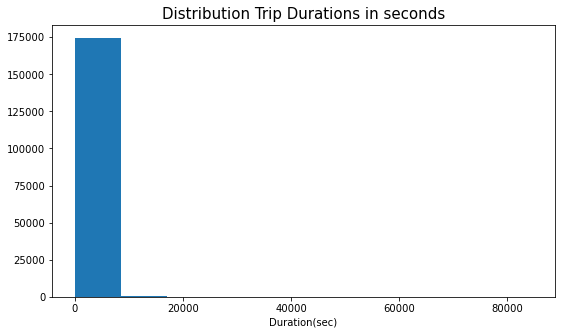

In [13]:
# start with a standard scale plot

plt.figure(figsize = (9,5))
plt.hist(data = df, x = 'duration_sec')
plt.xlabel('Duration(sec)')
plt.title('Distribution Trip Durations in seconds', fontsize = 15);

#### Observation
* The bar is displaced to the left side which could imply a long right tail of values with small occurence. Try log scale. 

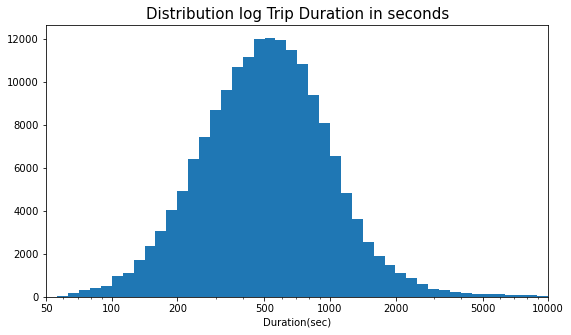

In [14]:
# distribution of duration on a log scale 
plt.figure(figsize = (9,5))
log_bin_size = 0.05
bins = 10**np.arange(0, np.log10(df.duration_sec).max()+log_bin_size, log_bin_size)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
tick = [50, 100, 200, 500, 1000, 2000, 5000, 10000]
label = ['{}'.format(n) for n in tick]
plt.xticks(tick, label)
plt.xlim(50, 10000)
plt.xlabel('Duration(sec)')
plt.title('Distribution log Trip Duration in seconds', fontsize = 15);


#### Observation
The distribution of trip duration is unimodal and right skewed when plotted on a log scale. The peak is around 500 secs. Also most of the trips are for a short duration of less than 1000 seconds.  

Explore user type

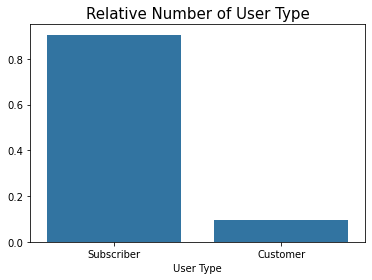

In [15]:
# explore user type
total_user = df.shape[0]

relative_user_type = df['user_type'].value_counts()/total_user
sns.barplot(x = relative_user_type.index, y = relative_user_type, color = sns.color_palette()[0])
plt.xlabel('User Type')
plt.title('Relative Number of User Type', fontsize = 15)
plt.ylabel('');

#### Observation
About 90% of the users are subscriber

Explore age distribution

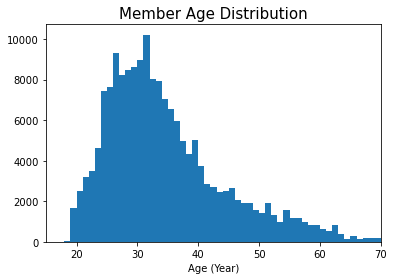

In [16]:
# member_age distribution

bin_size = 1
bins = np.arange(15, df.member_age.max()+bin_size, bin_size)
plt.hist(data = df, x = 'member_age', bins = bins);
plt.xlim(15, 70)
plt.xlabel('Age (Year)')
plt.title('Member Age Distribution', fontsize = 15);

#### Observation
most of the bike users are between age 20 and 40

Explore member gender 

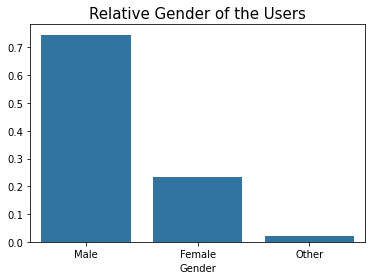

In [17]:
total_user = df.shape[0]

relative_member_gender = df['member_gender'].value_counts()/total_user
sns.barplot(x = relative_member_gender.index, y = relative_member_gender, color = sns.color_palette()[0])
plt.xlabel('Gender')
plt.title('Relative Gender of the Users', fontsize = 15)
plt.ylabel('');

#### Observation
More than 70% of the bike users are male.

Explore start day name

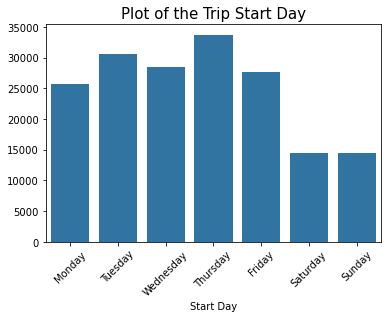

In [18]:
# explore start day name
sns.countplot(data = df, x = 'start_day_name', color = sns.color_palette()[0])
plt.xlabel('Start Day')
plt.title('Plot of the Trip Start Day', fontsize = 15)
plt.ylabel('')
plt.xticks(rotation = 45);

#### Observation
As expected most of the trips were made during the week day. Probably when users are going to work.

Explore start hour variable

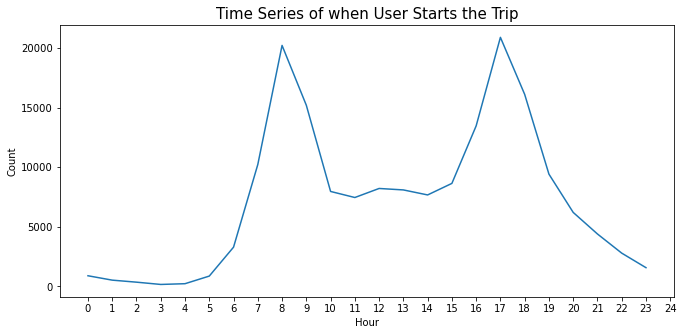

In [19]:
plt.figure(figsize = (11, 5))
plot_d = df['start_hour'].value_counts()
bins = np.arange(0, 24+1, 1)
sns.lineplot(x = plot_d.index, y = plot_d)
plt.xticks(ticks = bins, labels = bins)
plt.xlabel('Hour')
plt.title('Time Series of when User Starts the Trip', fontsize = 15)
plt.ylabel('Count');

#### Observation
As presumed, most of the trips occur between 7:00am and 9:00am when users are going to work and 4:00pm and 7:00pm when they are returning from work. 

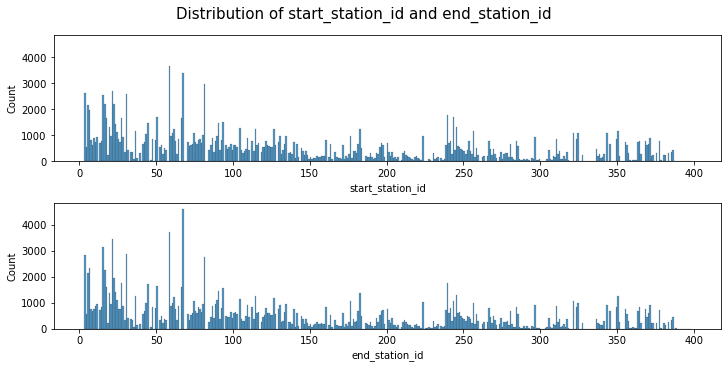

In [20]:
var = ['start_station_id', 'end_station_id']
fig, ax = plt.subplots(nrows = 2, constrained_layout = True, sharey =True, figsize = (10, 5))

for i, feature in enumerate(var):
    bin_size = 1
    bins = np.arange(3, df[feature].max()+ bin_size, bin_size)
    sns.histplot(data = df, x = feature, ax = ax[i], bins = bins)

fig.suptitle('Distribution of start_station_id and end_station_id', fontsize = 15);

#### Observation
Many of the stations have high peak as start station and as end station. This implies some station are more frequent by users. I wonder if start_station_id correlates with end_station_id

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of the trips duration was heavily pushed to the left due to some high outliers. So, under log transformation, the distribution is unimodal with most durations less than 1000 seconds. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* I engineered member age by subtracting member_birth_year from 2019. This is because age can give a better clue into the duration trips
* I extracted the day of the week when the trips were started because that can be insightful to know if users ride more during the week while working or during the weekend.
* I extracted the hour of the day when the trips were started because that can be insightful to know if people ride more when going to work, closing from work or in between. 

# Bivariate Exploration

Explore how age affects the duration of trips

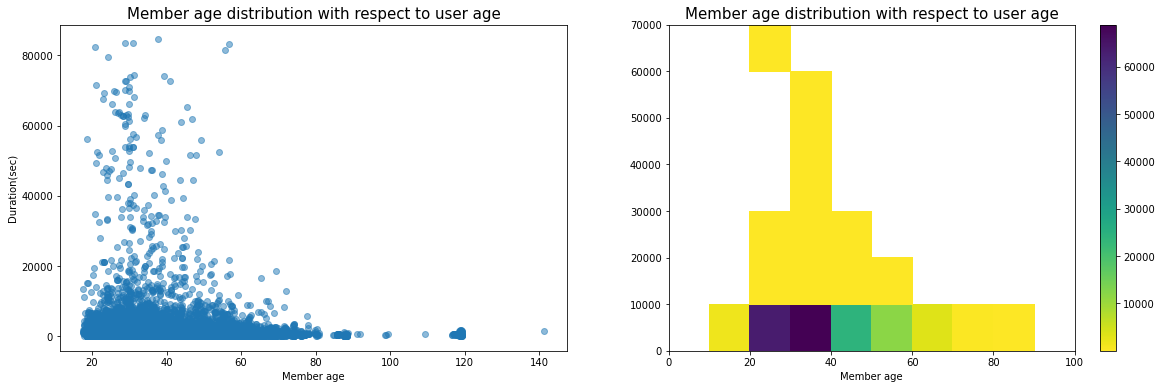

In [21]:
# duration and age 

plt.figure(figsize = (20, 6))

plt.subplot(1,2,1)
sns.regplot(data = df, y = 'duration_sec', x = 'member_age', x_jitter = 0.4, scatter_kws = {'alpha' : 1/2}, fit_reg = False)
plt.xlabel('Member age')
plt.ylabel('Duration(sec)')
plt.title('Member age distribution with respect to user age', fontsize = 15)


plt.subplot(1,2,2)
bin_x = np.arange(0, 100, 10)
bin_y = np.arange(0, 80000, 10000)
plt.hist2d(data = df, x = 'member_age', y = 'duration_sec', cmin = 10, cmap = 'viridis_r', bins = [bin_x, bin_y])
plt.xlim(0, 100)
plt.colorbar()
plt.xlabel('Member age')
plt.title('Member age distribution with respect to user age', fontsize = 15);

#### Observation
* Users between age 20 and 40 conver most of the trips duration.
* Some users between age 20 and 30 covers very high durations that is more than 60,000 seconds. 
* Young users less than 20 years and old users greater than 60 years only use bike for short trips less than 10,000 seconds. 

Explore how start station and end station affects the duration of the trips

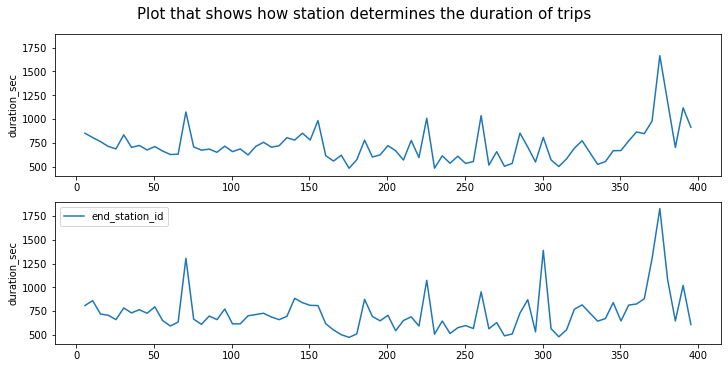

In [22]:
var = ['start_station_id', 'end_station_id']
fig, ax = plt.subplots(nrows = 2, constrained_layout = True, sharey =True, figsize = (10, 5))

for i, feature in enumerate(var):
    bin_size = 5
    bins = np.arange(df[feature].min(), df[feature].max() + bin_size, bin_size)
    bins_center = bins[:-1]+2.5
    station_id_binned = pd.cut(df[feature], bins = bins, include_lowest = True)
    plot_data = df['duration_sec'].groupby(station_id_binned).mean()
    sns.lineplot(x = bins_center, y = plot_data, ax = ax[i])
    plt.legend([feature])
fig.suptitle('Plot that shows how station determines the duration of trips', fontsize = 15);

#### Observation
There is a slight similarity between duration and the station identity. It can be inferred that long trip durations are more common between two similar station. 

<AxesSubplot:>

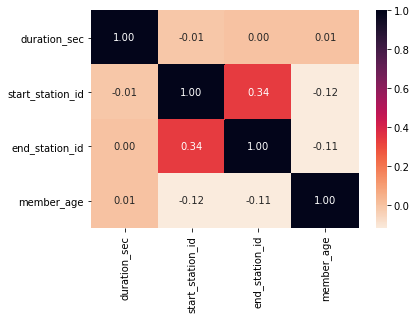

In [23]:
# explore the relations between numeric variables with heatmap

numeric_var = ["duration_sec", "start_time", 'end_time', "start_station_id", "end_station_id", "member_age"]

sns.heatmap(df[numeric_var].corr(),  annot=True, fmt='.2f', cmap = 'rocket_r')

#### Observation
Perceived correlations between start_station_id and end_station_id on trip duration is shown above. This implies that users use some station more.

Explore the effect of member gender on the duration of trip

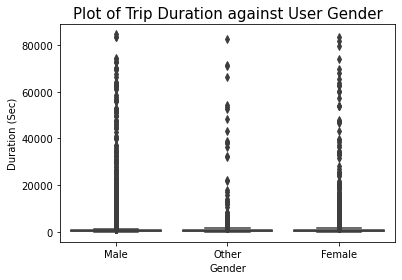

In [24]:
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec')
plt.xlabel('Gender')
plt.ylabel('Duration (Sec)')
plt.title('Plot of Trip Duration against User Gender', fontsize = 15);

The boxes aren't visible. Apply y limit

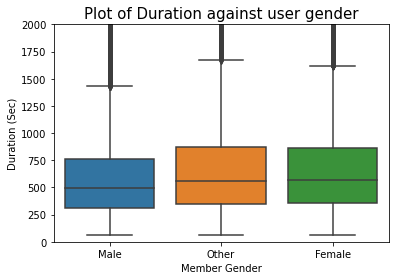

In [25]:
sns.boxplot(data = df, x = 'member_gender', y = 'duration_sec')
plt.ylim(0, 2000)
plt.xlabel('Member Gender')
plt.ylabel('Duration (Sec)')
plt.title('Plot of Duration against user gender', fontsize = 15);

#### Observation
Averagely, male users ride for a shorter durations than the remaining gender categories

Explore the relationship between duration of trips and user type

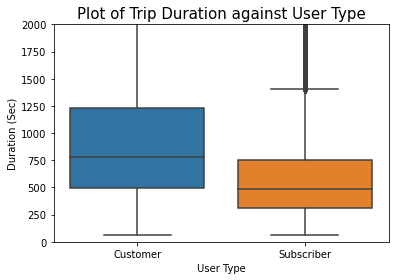

In [26]:
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec')
plt.ylim(0, 2000)
plt.xlabel('User Type')
plt.ylabel('Duration (Sec)')
plt.title('Plot of Trip Duration against User Type', fontsize = 15);

#### Observation
Averagely, customers ride for a longer duration than subscribers

Explore the relationship between duration of trips and the start day

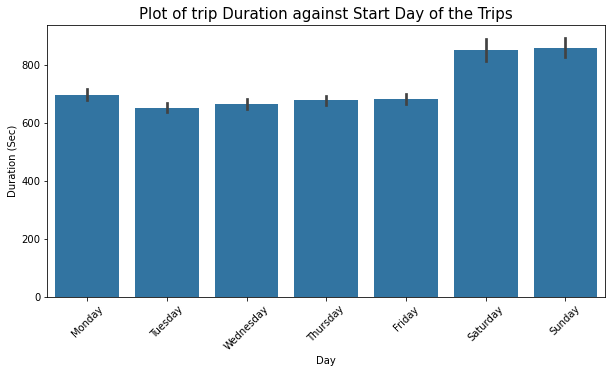

In [27]:
# Explore the relationship between duration of trips and the start day

plt.figure(figsize = (10,5))
sns.barplot(data = df, x = 'start_day_name', y = 'duration_sec', color = sns.color_palette()[0], estimator = np.mean)
plt.xticks(rotation = 45)
plt.xlabel('Day')
plt.ylabel('Duration (Sec)')
plt.title('Plot of trip Duration against Start Day of the Trips', fontsize = 15);

#### Observation
Though the number of trips during the weekdays is higher than that of the weekends as shown previously, users ride for a longer duration on the weekends than weekdays

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The trip duration was so much dependent on the age. Users between age 20 and 30 accounts for most of the trips durations. Though number of bike ride was higher during weekdays than weekends, user ride for a longer duration during weekends than weekdays. This could imply that user use bike for a longer trip that the routine distance between work and home during the week. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I actually expect male gender and subscriber user type with higher counts to have higher influence on trip duration but it was other way round. It could mean that the few customers that ride bike ride it for a very long duration.  

# Multivariate Exploration

I will like to explore trip duration against member age by user type and gender

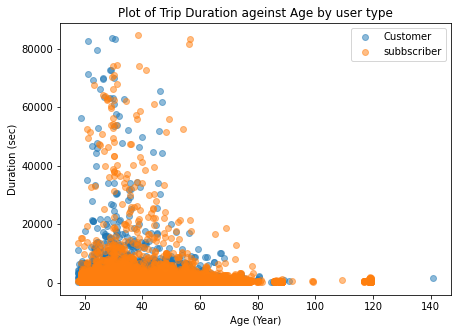

In [28]:
# Trip duration against member age by user type
plt.figure(figsize = (7, 5))
cat = [['Customer', 'o'], 
      ['Subscriber', '^']]

for ttype, marker in cat:
    plot_data = df[df.user_type == ttype]
    sns.regplot(data = plot_data, y = 'duration_sec', x = 'member_age', x_jitter = 0.4, 
            scatter_kws = {'alpha' : 1/2}, fit_reg = False)
    
plt.legend(['Customer', 'subbscriber'])
plt.xlabel('Age (Year)')
plt.ylabel('Duration (sec)')
plt.title('Plot of Trip Duration ageinst Age by user type');

Facet the plot to see the trend

<Figure size 864x504 with 0 Axes>

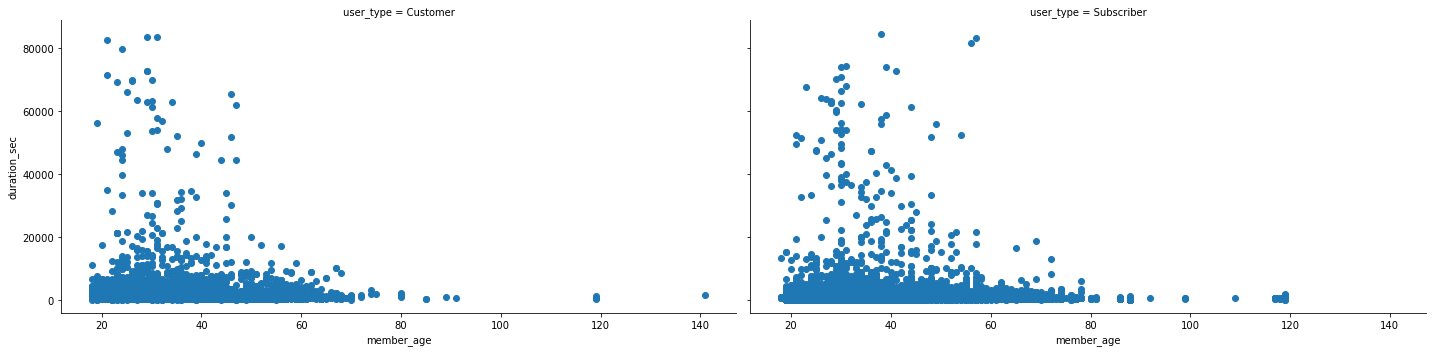

In [29]:
# Trip duration against member age by user type
plt.figure(figsize = (12, 7))
g = sns.FacetGrid(data = df, col = 'user_type', height=5, aspect=2)
g.map(plt.scatter, 'member_age', 'duration_sec')

#### Observation
As observed here, there is similar trend in trip duration against member age for both customer and subscriber but subscriber tints to slightly higher age than customer.

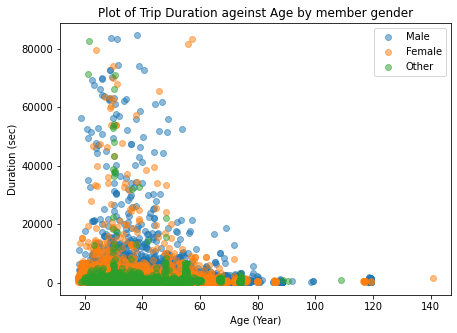

In [30]:
# Trip duration against member age by member gender
plt.figure(figsize = (7, 5))
cat = [['Male', 'o'], 
      ['Female', '^'],
      ['Other', 'x']]

for ttype, marker in cat:
    plot_data = df[df.member_gender == ttype]
    sns.regplot(data = plot_data, y = 'duration_sec', x = 'member_age', x_jitter = 0.4, 
            scatter_kws = {'alpha' : 1/2}, fit_reg = False)
    
plt.legend(['Male', 'Female', 'Other'])
plt.xlabel('Age (Year)')
plt.ylabel('Duration (sec)')
plt.title('Plot of Trip Duration ageinst Age by member gender');

Facet the plot to see the trend

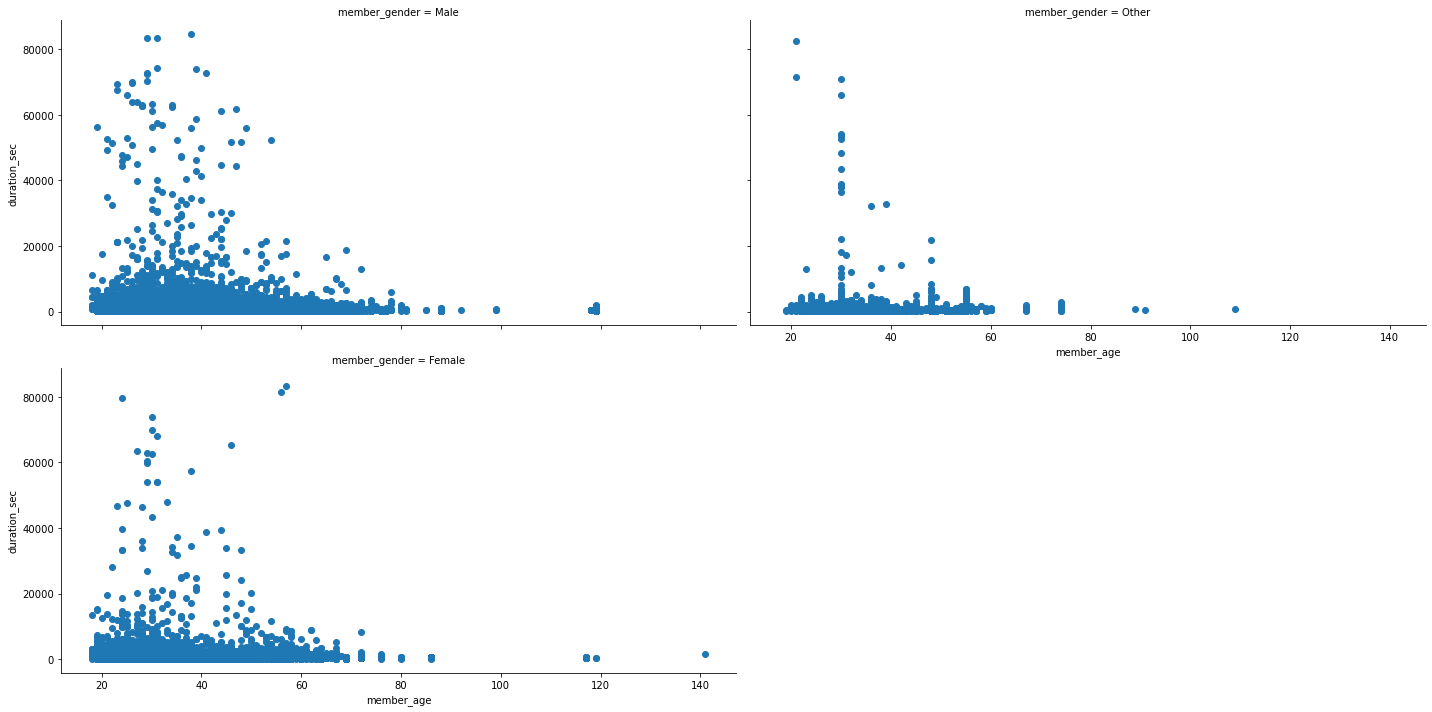

In [31]:
# Trip duration against member age by user type
g = sns.FacetGrid(data = df, col = 'member_gender', height=5, aspect=2, col_wrap = 2)
g.map(plt.scatter, 'member_age', 'duration_sec')
plt.tight_layout()

#### Observation
There is a similar trend between Male and Female gender but Male tends to go for high trips than female. Also, there is slightly higher older male rider than female. 

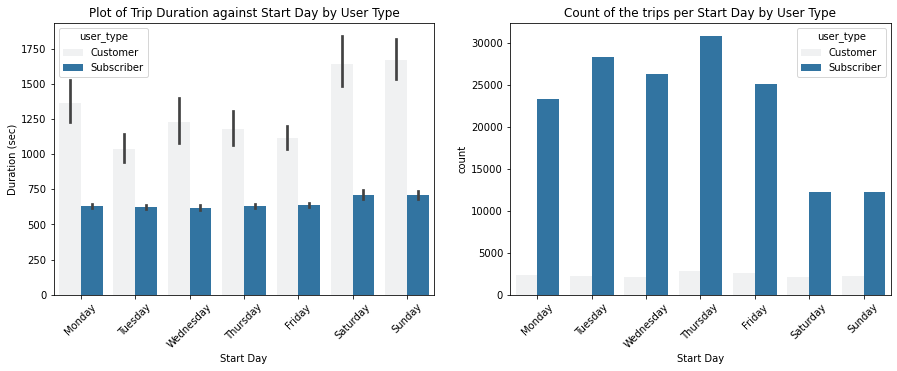

In [32]:
# Effect of start day on trip duration by user type 
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.barplot(data = df, x = 'start_day_name', y = 'duration_sec', color = sns.color_palette()[0], 
            estimator = np.mean, hue = 'user_type')
plt.xticks(rotation = 45)
plt.title('Plot of Trip Duration against Start Day by User Type')
plt.xlabel('Start Day')
plt.ylabel('Duration (sec)');


# Effect of user type on number of trips per start day
plt.subplot(1, 2, 2)
sns.countplot(data = df, x = 'start_day_name', color = sns.color_palette()[0], hue = 'user_type')
plt.xticks(rotation = 45)
plt.title('Count of the trips per Start Day by User Type')
plt.xlabel('Start Day');

#### Observation
The number of customer that use bike per day is fare less than subscriber but customer ride for a far longer duration per day than subscriber. Also, average duration per day remains fairly constant throughout the week for subscriber, this could mean subscribers are limited to a fixed trip duration as spelt out in the subscription; but customers ride for a longer duration according to their need at the moment.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Here I observed that the number of long duration trips travelled by male is more than that of female, but on a average, female ride for a higher duration than male. Also, there are more male riders older than 60 years than female. 

### Were there any interesting or surprising interactions between features?

Subscriber ride for a fairly constant number of seconds each day during the week which could imply plying the same route between work and home every day. Also, Customers ride for a far higher duration per day than subscriber; this could explain why there is higher average duration among customers than subscribers despite having a higher number of subscribers than customers.

## Conclusion
The trip durations was found to be influenced by the age of the users, their gender, the user type they belong, they day and the time of the day. 

* Users between age 20 and 40 cover most of the trip durations
* Male travels most of the high duration trips recorded but female travels on average for a high durations than male 
* Customers travel for a longer durations than subscribers 
* Users travel higher duration during the rushing hours in the morning (7:00am - 9:00am) and in the evening (4:00pm and 7:00pm) when they are going to work or returning home respectively. 